In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
url = 'https://andybek.com/pandas-soccer'

In [496]:
# reading players data
players = pd.read_csv(url)
players.head(5)
# players.market_value = players.market_value * 1000000

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [497]:
# statistical summary
players.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,465.000000,465.000000,462.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,26.776344,2.178495,11.125649,771.546237,5.450538,57.544086,1.989247,0.034409,3.195699,10.253763,0.309677,0.144086
std,3.956863,0.995880,12.312959,931.631982,1.341370,52.941969,0.954737,0.182473,1.279136,5.766665,0.462859,0.351555
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
10%,21.000000,1.000000,1.000000,126.000000,4.500000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,221.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,461.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,29.000000,3.000000,15.000000,935.000000,6.000000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
90%,32.000000,3.000000,29.800000,1756.600000,7.300000,130.000000,4.000000,0.000000,5.000000,18.000000,1.000000,1.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [498]:
# handling outliers
players = players[players.market_value.between(0.05, 40)]
players = players[players.page_views.between(3, 3000)]
players = players[players.fpl_points.between(0, 150)].reset_index(drop=True)

In [499]:
players.drop(columns=['name', 'position_cat', 'fpl_sel', 'region', 'nationality', 'new_foreign',
                      'age_cat', 'club_id', 'new_signing', 'big_club'], inplace=True)

In [500]:
# chaceking all columns and their dtype
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   club          433 non-null    object 
 1   age           433 non-null    int64  
 2   position      433 non-null    object 
 3   market_value  433 non-null    float64
 4   page_views    433 non-null    int64  
 5   fpl_value     433 non-null    float64
 6   fpl_points    433 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.8+ KB


In [501]:
# checking for NaN's
players.isna().sum()

club            0
age             0
position        0
market_value    0
page_views      0
fpl_value       0
fpl_points      0
dtype: int64

In [502]:
# handling NaN's
from sklearn.impute import SimpleImputer

si_X = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
players['position'] = si_X.fit_transform(players.loc[:,['position']])
players['market_value'].fillna(players['market_value'].mean(), inplace = True)

In [503]:
# rechecking for NaN's
players.isna().sum()

club            0
age             0
position        0
market_value    0
page_views      0
fpl_value       0
fpl_points      0
dtype: int64

In [504]:
# handling categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder(sparse=False)
X_categories = ohe.fit_transform(players.loc[:,['club', 'position']])
X_categories = pd.DataFrame(X_categories)
X_categories.columns = ohe.get_feature_names_out()
X_categories = X_categories.iloc[:,:]

### Feature Selection

In [505]:
from sklearn.feature_selection import SelectKBest, f_regression
y = players.loc[:, 'market_value']
FeatureSelector = SelectKBest(score_func=f_regression, k=20)
X_categories_new = FeatureSelector.fit_transform(X_categories, y)
X_categories_new = pd.DataFrame(X_categories_new)
X_categories_new.columns = FeatureSelector.get_feature_names_out()

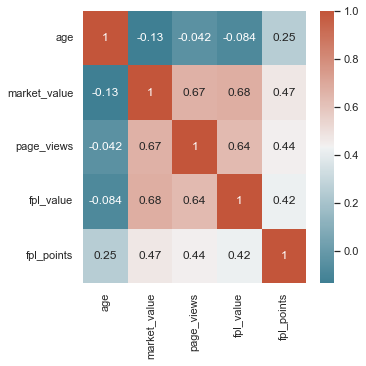

In [506]:
# correlation between the variables
corr = players.corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
               cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.set(rc={'figure.figsize':(5,5)})

In [507]:
# choosing our features and target variable
X = pd.concat([X_categories_new, players.iloc[:, [1, 4, 5, 6]]], axis=1, ignore_index=True).to_numpy()
y = players.loc[:,['market_value']].to_numpy()

In [508]:
# splitting our data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [509]:
# scaling the data
# from sklearn.preprocessing import StandardScaler
# st_X = StandardScaler()
# st_y = StandardScaler()
# X_train = st_X.fit_transform(X_train)
# y_train = st_y.fit_transform(y_train)
# X_test = st_X.transform(X_test)
# y_test = st_y.transform(y_test)

### Multiple Linear Regression

In [514]:
# fitting data to Multiple Linear Regressor
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [515]:
# predicting our Training data
y_pred1 = regressor1.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred1)

4.015017190281885

In [516]:
# comparing actual Test cases with predicted Test cases
list(zip(y_test, y_pred1))

[(array([7.]), array([15.20348741])),
 (array([7.]), array([5.11125304])),
 (array([12.]), array([8.61510716])),
 (array([3.]), array([4.05808575])),
 (array([22.]), array([20.02550783])),
 (array([1.5]), array([2.14433469])),
 (array([18.]), array([15.45089826])),
 (array([8.]), array([4.6051871])),
 (array([25.]), array([16.89762852])),
 (array([20.]), array([12.76380206])),
 (array([1.]), array([2.36376628])),
 (array([35.]), array([20.71018718])),
 (array([0.5]), array([2.75950235])),
 (array([0.5]), array([0.88023859])),
 (array([5.]), array([5.03934465])),
 (array([22.]), array([10.1915713])),
 (array([5.]), array([8.07684948])),
 (array([9.]), array([7.81483807])),
 (array([30.]), array([25.72244059])),
 (array([6.]), array([2.13818188])),
 (array([22.]), array([20.02550783])),
 (array([4.]), array([14.98596934])),
 (array([15.]), array([17.47955196])),
 (array([10.]), array([7.08819761])),
 (array([20.]), array([27.38078427])),
 (array([9.]), array([10.36430822])),
 (array([2.5

##### *Comment - MAE of 4.02 is fine for this dataset. However problem is the presence of negative market value. Therefore this Linear model is not at a good fit.*

### Random Forest Regression

In [517]:
from sklearn.ensemble import RandomForestRegressor
for_regressor = RandomForestRegressor(n_estimators = 25, random_state=0)
for_regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=25, random_state=0)

In [518]:
y_pred2 = for_regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred2)

3.4234252873563213

In [519]:
# comparing actual Test cases with predicted Test cases
list(zip(y_test, y_pred2))

[(array([7.]), 14.04),
 (array([7.]), 5.18),
 (array([12.]), 8.76),
 (array([3.]), 3.24),
 (array([22.]), 22.6),
 (array([1.5]), 3.36),
 (array([18.]), 12.14),
 (array([8.]), 4.21),
 (array([25.]), 9.14),
 (array([20.]), 16.18),
 (array([1.]), 4.56),
 (array([35.]), 19.92),
 (array([0.5]), 2.94),
 (array([0.5]), 2.51),
 (array([5.]), 5.8),
 (array([22.]), 12.02),
 (array([5.]), 5.66),
 (array([9.]), 8.26),
 (array([30.]), 27.56),
 (array([6.]), 3.84),
 (array([22.]), 22.6),
 (array([4.]), 13.72),
 (array([15.]), 14.48),
 (array([10.]), 4.4),
 (array([20.]), 27.64),
 (array([9.]), 4.64),
 (array([2.5]), 10.88),
 (array([1.]), 0.73),
 (array([6.]), 5.5),
 (array([9.]), 14.96),
 (array([18.]), 18.72),
 (array([15.]), 12.08),
 (array([3.]), 4.94),
 (array([1.5]), 4.66),
 (array([35.]), 20.52),
 (array([24.]), 23.2),
 (array([1.5]), 1.59),
 (array([7.]), 6.68),
 (array([1.5]), 1.41),
 (array([7.]), 3.33),
 (array([0.5]), 0.35),
 (array([25.]), 21.64),
 (array([5.]), 8.56),
 (array([1.5]), 1

##### *Comment - MAE of 3.42 is acceptable for this case. This model also overcomes the negative market value issue present in Linear Regression model. Therefore, this model can is acceptable.*